<img align="right" src="https://www.universidadviu.com/sites/universidadviu.com/themes/custom/sbx_theme/logo.webp" width="175">

<div style="clear: both; margin: 0; padding: 0; line-height: 0;"></div>

<hr style="border: 0; height: 4px; background: #E65015; margin-top: 0px;">

# <span style="font-size: 3rem; font-weight: bold;">Algoritmos: Actividad Guiada 2</span>

## <span style="font-size: 1.5rem;">David Bouzas i Morales</span>  
## <span style="font-size: 1.5rem;">Lunes, 26 de enero de 2026</span>

---

### **Enlace a GitHub**
<div style="flex: 1; text-align: justify;">

https://github.com/19DavidBM/Algoritmos-de-Optimizacion/tree/main/Actividades_Guiadas/Actividad_2

</div>

In [1]:
import math

##Programación Dinámica. Viaje por el rio
* **Definición**: Es posible dividir el problema en subproblemas más pequeños, guardando las soluciones para ser utilizadas más adelante.
* **Características** que permiten identificar problemas aplicables:<br>
  -Es posible almacenar soluciones de los subproblemas para ser utilizados más adelante<br>
  -Debe verificar el principio de optimalidad de Bellman: “en una secuencia optima de decisiones, toda sub-secuencia también es óptima” (*)<br>
  -La necesidad de guardar la información acerca de las soluciones parciales unido a la recursividad provoca la necesidad de preocuparnos por la complejidad espacial (cuantos recursos de espacio usaremos)<br>

###Problema<br>
En un río hay **n** embarcaderos y debemos desplazarnos río abajo desde un embarcadero a otro. Cada embarcadero tiene precios diferentes para ir de un embarcadero a otro situado más abajo. Para ir del embarcadero i al j, puede ocurrir que sea más barato hacer un trasbordo por un embarcadero intermedio k. El problema consiste en determinar la combinación más barata.

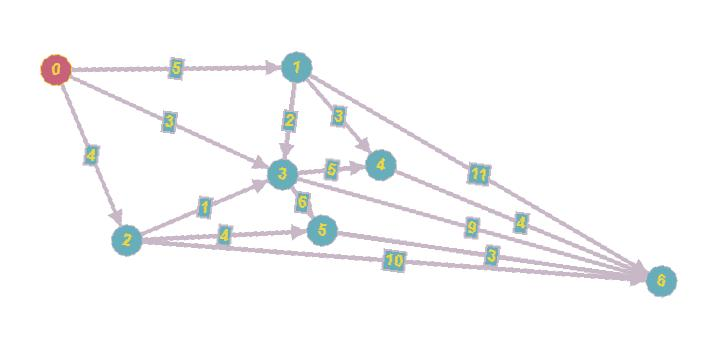

*Consideramos una tabla TARIFAS(i,j) para almacenar todos los precios que nos ofrecen los embarcaderos.<br>
*Si no es posible ir desde i a j daremos un valor alto para garantizar que ese trayecto no se va a elegir en la ruta óptima(modelado habitual para restricciones)

In [2]:
#Viaje por el rio - Programación dinámica
################################################################################

TARIFAS = [
[0,5,4,3,float("inf"),999,999],   #desde nodo 0
[999,0,999,2,3,999,11],  #desde nodo 1
[999,999, 0,1,999,4,10], #desde nodo 2
[999,999,999, 0,5,6,9],
[999,999, 999,999,0,999,4],
[999,999, 999,999,999,0,3],
[999,999,999,999,999,999,0]
]

#999 se puede sustituir por float("inf") del modulo math
TARIFAS

[[0, 5, 4, 3, inf, 999, 999],
 [999, 0, 999, 2, 3, 999, 11],
 [999, 999, 0, 1, 999, 4, 10],
 [999, 999, 999, 0, 5, 6, 9],
 [999, 999, 999, 999, 0, 999, 4],
 [999, 999, 999, 999, 999, 0, 3],
 [999, 999, 999, 999, 999, 999, 0]]

In [3]:
#Calculo de la matriz de PRECIOS y RUTAS
#  PRECIOS - contiene la matriz del mejor precio para ir de un nodo a otro
#  RUTAS   - contiene los nodos intermedios para ir de un nodo a otro
################################################################
def Precios(TARIFAS):
################################################################
  #Total de Nodos
  N = len(TARIFAS[0])

  #Inicialización de la tabla de precios
  PRECIOS = [ [9999]*N for i in [9999]*N]  #n x n
  RUTA = [ [""]*N for i in [""]*N]

  #Se recorren todos los nodos con dos bucles(origen - destino)
  #  para ir construyendo la matriz de PRECIOS
  for i in range(N-1):
    for j in range(i+1, N):
      MIN = TARIFAS[i][j]
      RUTA[i][j] = i

      for k in range(i, j):
        if PRECIOS[i][k] + TARIFAS[k][j] < MIN:
            MIN = min(MIN, PRECIOS[i][k] + TARIFAS[k][j] )
            RUTA[i][j] = k
        PRECIOS[i][j] = MIN

  return PRECIOS,RUTA

In [4]:
PRECIOS,RUTA = Precios(TARIFAS)
#print(PRECIOS[0][6])

print("PRECIOS")
for i in range(len(TARIFAS)):
  print(PRECIOS[i])

print("\nRUTA")
for i in range(len(TARIFAS)):
  print(RUTA[i])

PRECIOS
[9999, 5, 4, 3, 8, 8, 11]
[9999, 9999, 999, 2, 3, 8, 7]
[9999, 9999, 9999, 1, 6, 4, 7]
[9999, 9999, 9999, 9999, 5, 6, 9]
[9999, 9999, 9999, 9999, 9999, 999, 4]
[9999, 9999, 9999, 9999, 9999, 9999, 3]
[9999, 9999, 9999, 9999, 9999, 9999, 9999]

RUTA
['', 0, 0, 0, 1, 2, 5]
['', '', 1, 1, 1, 3, 4]
['', '', '', 2, 3, 2, 5]
['', '', '', '', 3, 3, 3]
['', '', '', '', '', 4, 4]
['', '', '', '', '', '', 5]
['', '', '', '', '', '', '']


In [5]:
#Calculo de la ruta usando la matriz RUTA
def calcular_ruta(RUTA, desde, hasta):
  if desde == RUTA[desde][hasta]:
  #if desde == hasta:
    #print("Ir a :" + str(desde))
    return desde
  else:
    return str(calcular_ruta(RUTA, desde, RUTA[desde][hasta])) +  ',' + str(RUTA[desde][hasta])

print("\nLa ruta es:")
calcular_ruta(RUTA, 0,6)


La ruta es:


'0,2,5'

##Problema de Asignacion de tarea

In [6]:
#Asignacion de tareas - Ramificación y Poda
################################################################################
#    T A R E A
#   A
#   G
#   E
#   N
#   T
#   E

# Agentes: Filas, Tareas: Columnas
COSTES=[[11,12,18,40],
        [14,15,13,22],
        [11,17,19,23],
        [17,14,20,28]]


In [7]:
#Calculo del valor de una solucion parcial
def valor(S,COSTES):
  VALOR = 0
  for i in range(len(S)):
    VALOR += COSTES[S[i]][i]
  return VALOR


# Índice tupla (0 a 3): Tarea
# Valor (0 a 3): Agente
valor((3,2,  ),COSTES) # (Tarea 0, Agente 3): 17 + (Tarea 1, Agente 2): 17

34

In [8]:
#Coste inferior para soluciones parciales
#  (1,3,) Se asigna la tarea 1 al agente 0 y la tarea 3 al agente 1

def CI(S,COSTES):
  VALOR = 0
  #Valores establecidos
  for i in range(len(S)):
    VALOR += COSTES[i][S[i]]

  #Estimacion de lo que falta
  for i in range( len(S), len(COSTES)   ):
    VALOR += min( [ COSTES[j][i] for j in range(len(S), len(COSTES))  ]) # mira tareas libres y añade mínimo coste
  return VALOR

def CS(S,COSTES):
  VALOR = 0
  #Valores establecidos
  for i in range(len(S)):
    VALOR += COSTES[i][S[i]]

  #Estimacion
  for i in range( len(S), len(COSTES)   ):
    VALOR += max( [ COSTES[j][i] for j in range(len(S), len(COSTES))  ])
  return VALOR

CI((0,1),COSTES)

68

In [9]:
#Genera tantos hijos como como posibilidades haya para la siguiente elemento de la tupla
#(0,) -> (0,1), (0,2), (0,3)
def crear_hijos(NODO, N):
  HIJOS = []
  for i in range(N ):
    if i not in NODO:
      HIJOS.append({'s':NODO +(i,)    })
  return HIJOS

In [10]:
crear_hijos((0,) , 4)

[{'s': (0, 1)}, {'s': (0, 2)}, {'s': (0, 3)}]

In [11]:
def ramificacion_y_poda(COSTES):
#Construccion iterativa de soluciones(arbol). En cada etapa asignamos un agente(ramas).
#Nodos del grafo  { s:(1,2),CI:3,CS:5  }
  #print(COSTES)
  DIMENSION = len(COSTES)
  MEJOR_SOLUCION=tuple( i for i in range(len(COSTES)) )
  CotaSup = valor(MEJOR_SOLUCION,COSTES)
  #print("Cota Superior:", CotaSup)

  NODOS=[]
  NODOS.append({'s':(), 'ci':CI((),COSTES)    } )

  iteracion = 0

  while( len(NODOS) > 0):
    iteracion +=1

    nodo_prometedor = [ min(NODOS, key=lambda x:x['ci']) ][0]['s']
    #print("Nodo prometedor:", nodo_prometedor)

    #Ramificacion
    #Se generan los hijos
    HIJOS =[ {'s':x['s'], 'ci':CI(x['s'], COSTES)   } for x in crear_hijos(nodo_prometedor, DIMENSION) ]

    #Revisamos la cota superior y nos quedamos con la mejor solucion si llegamos a una solucion final
    NODO_FINAL = [x for x in HIJOS if len(x['s']) == DIMENSION  ]
    if len(NODO_FINAL ) >0:
      #print("\n********Soluciones:",  [x for x in HIJOS if len(x['s']) == DIMENSION  ] )
      if NODO_FINAL[0]['ci'] < CotaSup:
        CotaSup = NODO_FINAL[0]['ci']
        MEJOR_SOLUCION = NODO_FINAL

    #Poda
    HIJOS = [x for x in HIJOS if x['ci'] < CotaSup   ]

    #Añadimos los hijos
    NODOS.extend(HIJOS)

    #Eliminamos el nodo ramificado
    NODOS =  [  x for x in NODOS if x['s'] != nodo_prometedor    ]

  print("La solucion final es:" ,MEJOR_SOLUCION , " en " , iteracion , " iteraciones" , " para dimension: " ,DIMENSION  )



ramificacion_y_poda(COSTES)

La solucion final es: [{'s': (1, 2, 0, 3), 'ci': 64}]  en  10  iteraciones  para dimension:  4


## **Mejora: Ramificación y Poda**

**1. Generar matrices con valores aleatorios de mayores
dimensiones (5,6,7,…) y ejecutar ambos algoritmos.**

In [12]:
import random
import time

# Método para generar matrices aleatorias daa una dimensión y valor mínimo y máximo
def generar_matriz_aleatoria(dim, min_val=10, max_val=50):
    return [[random.randint(min_val, max_val) for _ in range(dim)] for _ in range(dim)]

generar_matriz_aleatoria(7)

[[35, 16, 17, 16, 15, 12, 45],
 [46, 34, 32, 24, 27, 10, 11],
 [11, 40, 37, 21, 47, 44, 45],
 [49, 11, 36, 45, 26, 23, 40],
 [36, 49, 34, 24, 17, 32, 22],
 [40, 35, 22, 20, 15, 48, 35],
 [37, 28, 10, 31, 13, 18, 42]]

**2. ¿A partir de que dimensión el algoritmo por fuerza bruta
deja de ser una opción?**

En el problema de asignación de $N$ tareas a $N$ agentes, la primera tarea puede ser realizada por cualquier agente ($N$ opciones), la segunda por cualquiera de los restantes ($N-1$ opciones), y así sucesivamente.La fórmula de complejidad para la Fuerza Bruta es:$$T(n) \approx k \cdot n!$$

Donde:

- $n$: Es el número de agentes/tareas (dimensión).
- $n!$: Representa el número total de permutaciones posibles ($n \cdot (n-1) \cdot (n-2) \cdot ... \cdot 1$).
- $k$: Es el tiempo constante que tarda el procesador en calcular el coste de una sola combinación.

Si asumimos que un ordenador moderno, por ejemplo, puede evaluar 1.000.000 de combinaciones por segundo:

Entonces, para $N=10$ --> $10! = 3.628.800$ operaciones --> 3.628.800/1.000.000 ≈ 3.6 segundos

Para $N=15$ --> $15! = 1.3076744e+12$ operaciones --> 1.3076744e+12/1.000.000 ≈ 1.307.674 segundos = 15.1 días

Y si calculamos para N = 16 sería multiplicar 15.1 días por 16 = 242.1 días. Un solo incremento en la dimensión ($15 \rightarrow 16$) convierte una espera de dos semanas en casi un año de computación. Por eso, a partir de 15, la Fuerza Bruta deja de ser una opción técnica.

**3. ¿Hay algún valor de la dimensión a partir de la cual el
algoritmo de ramificación y poda también deja de ser una
opción válida?**

Aunque ramificación y poda es mucho más eficiente, sigue siendo un algoritmo que explora un espacio de estados en el peor de los casos exponencial. A diferencia de la Fuerza Bruta, que solo necesita "contar", el algoritmo de ramificación y poda necesita guardar los nodos pendientes en una lista. Si la cota no es muy ajustada, la lista de nodos crece exponencialmente. Para, por ejemplo, N = 30 podríamos necesitar gigabytes de RAM solo para almacenar los nodos que faltan por explorar, provocando que el programa colapse.

##Descenso del gradiente

In [13]:
import math                      #Funciones matematicas
import matplotlib.pyplot as plt  #Generacion de gráficos (otra opcion seaborn)
import numpy as np               #Tratamiento matriz N-dimensionales y otras (fundamental!)
#import scipy as sc

import random

Vamos a buscar el minimo de la funcion paraboloide : $$f(x) =  x² + y²$$

Obviamente se encuentra en (x,y)=(0,0) pero probaremos como llegamos a él a través del descenso del gradiante.

In [14]:
#Definimos la funcion
#Paraboloide
f  = lambda X:      X[0]**2 + X[1]**2    #Funcion derivada
df = lambda X: [2*X[0] , 2*X[1]]         #Gradiente

df([1,2])

[2, 4]

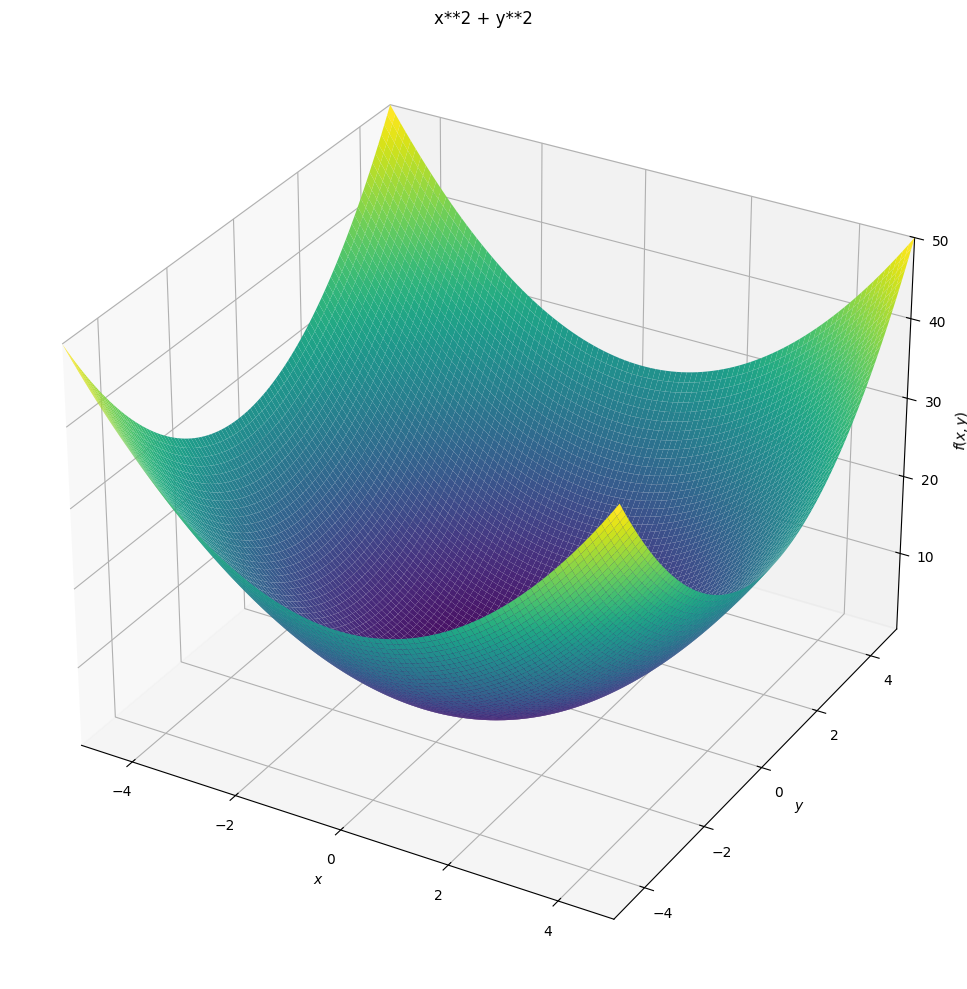

In [15]:
from sympy import symbols
from sympy.plotting import plot
from sympy.plotting import plot3d
x,y = symbols('x y')
plot3d(x**2 + y**2,
       (x,-5,5),(y,-5,5),
       title='x**2 + y**2',
       size=(10,10))

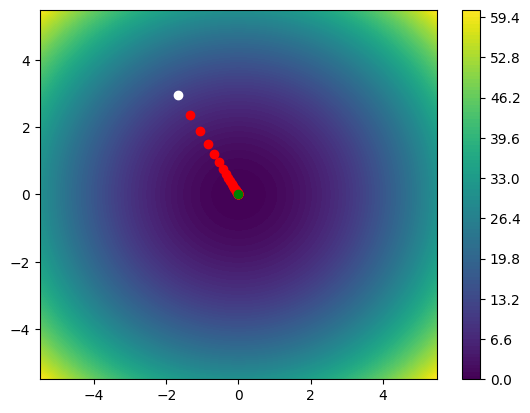

Solucion: [-2.3769101476883332e-05, 4.2083065141179164e-05] 2.335954556695106e-09


In [16]:
#Prepara los datos para dibujar mapa de niveles de Z
resolucion = 100
rango=5.5

X=np.linspace(-rango,rango,resolucion)
Y=np.linspace(-rango,rango,resolucion)
Z=np.zeros((resolucion,resolucion))
for ix,x in enumerate(X):
  for iy,y in enumerate(Y):
    Z[iy,ix] = f([x,y])

#Pinta el mapa de niveles de Z
plt.contourf(X,Y,Z,resolucion)
plt.colorbar()

#Generamos un punto aleatorio inicial y pintamos de blanco
P=[random.uniform(-5,5  ),random.uniform(-5,5 ) ]
plt.plot(P[0],P[1],"o",c="white")

#Tasa de aprendizaje. Fija. Sería más efectivo reducirlo a medida que nos acercamos.
TA=.1

#Iteraciones:50
for _ in range(50):
  grad = df(P)
  #print(P,grad)
  P[0],P[1] = P[0] - TA*grad[0] , P[1] - TA*grad[1]
  plt.plot(P[0],P[1],"o",c="red")

#Dibujamos el punto final y pintamos de verde
plt.plot(P[0],P[1],"o",c="green")
plt.show()
print("Solucion:" , P , f(P))


## **Mejora: Optimización de la función**

**¿Te atreves a optimizar la función?:**

$$f(x, y) = \sin\left(\frac{1}{2}x^2 - \frac{1}{4}y^2 + 3\right) \cdot \cos(2x + 1 - e^y)$$
<br>
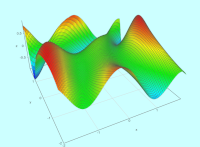


In [17]:
#Definimos la funcion
f= lambda X: math.sin(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3) *math.cos(2*X[0] + 1 - math.exp(X[1]) )


Para optimizar la función f(x) el primer paso es analizarla. En este caso, se trata de una función trigonométrica compuesta, lo que significa que **no es convexa** y, por lo tanto, tiene varios mínimos locales y crestas, lo que nos va a dificultar encontrar el mínimo absoluto.

A continaución, necesitamos obtener el vector gradiente de nuestra función $f(x, y) = \sin(A) \cdot \cos(B)$, donde $A = \frac{1}{2}x^2 - \frac{1}{4}y^2 + 3$ y $B = 2x + 1 - e^y$. Para ello, vamos a calcular cómo cambia la función cuando movemos $x$ (derivada parcial $\partial x$) y cuando movemos $y$ (derivada parcial $\partial y$).

Las derivadas que implementaremos son:
$$\frac{\partial f}{\partial x} = x \cos(A) \cos(B) - 2 \sin(A) \sin(B)$$$$\frac{\partial f}{\partial y} = -0.5y \cos(A) \cos(B) + e^y \sin(A) \sin(B)$$

In [18]:
import numpy as np

# Método que calcula el vector gradiente en el punto P= [x, y]
def gradiente_f(P):
    x = P[0]
    y = P[1]

    # Valores de A y B
    A = 0.5 * x**2 - 0.25 * y**2 + 3
    B = 2 * x + 1 - np.exp(y)

    # Derivada parcial respecto a x (regla de la cadena y del producto)
    df_dx = (x * np.cos(A) * np.cos(B)) - (2 * np.sin(A) * np.sin(B))

    # Derivada parcial respecto a y (regla de la cadena y del producto)
    df_dy = (-0.5 * y * np.cos(A) * np.cos(B)) + (np.exp(y) * np.sin(A) * np.sin(B))

    return np.array([df_dx, df_dy])

Una vez implementado el funcionamiento del gradiente, el siguiente paso es definir el proceso iterativo. Debido a que la función es no-convexa, el punto inicial es crucial. Si empezamos en un punto con gradiente cero, el algoritmo no se moverá; por ello, inicializamos el punto $P$ de forma aleatoria.

En cada iteración, restamos el gradiente multiplicado por la tasa de aprendizaje ($TA$) a nuestra posición actual. Este signo negativo es el que garantiza que nos movemos en dirección contraria a la pendiente, es decir, hacia el descenso. Tras completar las iteraciones, el punto debería haber convergido en uno de los mínimos locales de la función.



**1. Punto de partida ($P$)**: Lo generamos aleatoriamente para evitar puntos críticos conocidos.

**2. Tasa de Aprendizaje ($TA$)**: Controla el tamaño del salto. Por ejemplo, $TA = 0.05$.

**3. Iteraciones**: Repetiremos el proceso (por ejemplo, 100 veces) para permitir que el punto llegue al fondo del mínimo.



In [19]:
import random

# 1. Punto de partida inicial aleatorio
P = np.array([random.uniform(-2, 2), random.uniform(-2, 2)])
print(f"Punto de inicio aleatorio: {P}")

# 2. Tasa de Aprendizaje
TA = 0.05
iteraciones = 100

# Historial de las iteraciones
historial = [P]

# 3. Bucle de optimización
for i in range(iteraciones):
    # Cálculo del gradiente
    grad = gradiente_f(P)

    # Actualizar posición en dirección opuesta al gradiente (para bajar)
    P = P - TA * grad

    # Guardar la nueva posición
    historial.append(P)

print(f"Punto final tras la optimización: {P}")
print(f"Valor mínimo encontrado: {f(P)}")

Punto de inicio aleatorio: [-1.29397703  1.88531245]
Punto final tras la optimización: [-0.7651675   2.24002531]
Valor mínimo encontrado: -0.7837833461782076


Finalmente, representamos el comportamiento del algoritmo sobre un mapa de contorno. En la siguiente gráfica, el fondo de color representa los valores de la función. Las zonas de color más oscuro corresponden a los mínimos que estamos buscando. La línea rojo muestra el camino que ha seguido el algoritmo. Podemos observar cómo el punto se mueve perpendicularmente a las líneas de nivel, buscando siempre la dirección de máxima pendiente descendente y el punto verde final indica dónde se detuvo la optimización.

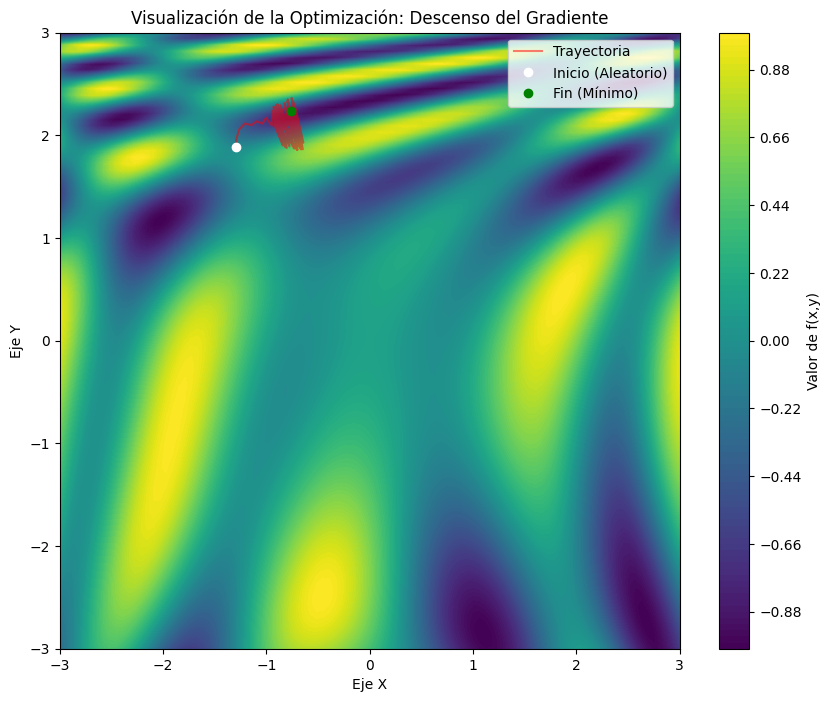

Coordenadas del mínimo encontrado: [-0.7651675   2.24002531]
Valor de la función en ese punto: -0.7837833461782076


In [21]:
import matplotlib.pyplot as plt

# 0. Necesitamos la función original para calcular el mapa de colores
def f(X):
    arg1 = 0.5 * X[0]**2 - 0.25 * X[1]**2 + 3
    arg2 = 2 * X[0] + 1 - np.exp(X[1])
    return np.sin(arg1) * np.cos(arg2)

# 1. Preparamos el terreno (el mapa)
resolucion = 100
rango = 3
X_vals = np.linspace(-rango, rango, resolucion)
Y_vals = np.linspace(-rango, rango, resolucion)
Z = np.zeros((resolucion, resolucion))

for ix, x in enumerate(X_vals):
    for iy, y in enumerate(Y_vals):
        Z[iy, ix] = f([x, y])

# 2. Creamos la figura
plt.figure(figsize=(10, 8))
mapa = plt.contourf(X_vals, Y_vals, Z, resolucion, cmap='viridis')
plt.colorbar(mapa, label='Valor de f(x,y)')

# 3. Dibujamos la trayectoria que guardamos en el historial (Paso 3)
# Convertimos el historial a una matriz para manejarlo fácil
historial_np = np.array(historial)

# Dibujamos la línea de camino
plt.plot(historial_np[:, 0], historial_np[:, 1], 'r-', alpha=0.5, label='Trayectoria')

# Dibujamos los puntos clave
plt.plot(historial_np[0, 0], historial_np[0, 1], 'wo', label='Inicio (Aleatorio)')
plt.plot(historial_np[-1, 0], historial_np[-1, 1], 'go', label='Fin (Mínimo)')

plt.title("Visualización de la Optimización: Descenso del Gradiente")
plt.xlabel("Eje X")
plt.ylabel("Eje Y")
plt.legend()
plt.show()

print(f"Coordenadas del mínimo encontrado: {P}")
print(f"Valor de la función en ese punto: {f(P)}")